In [38]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import wrangle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer


In [2]:
df = wrangle.wrangle_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48372 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     48372 non-null  float64
 1   bathrooms    48372 non-null  float64
 2   squarefeet   48372 non-null  float64
 3   total_taxes  48372 non-null  float64
 4   yearbuilt    48372 non-null  float64
 5   taxamount    48372 non-null  float64
 6   county       48372 non-null  object 
dtypes: float64(6), object(1)
memory usage: 3.0+ MB


In [3]:
df.head()

,bedrooms,bathrooms,squarefeet,total_taxes,yearbuilt,taxamount,county
0,4.0,4.0,2954.0,735227.0,1924.0,9057.14,Los_Angeles
1,4.0,2.0,1390.0,429900.0,1962.0,4892.26,Orange
2,2.0,1.0,823.0,148542.0,1986.0,2666.78,Los_Angeles
3,4.0,3.0,2966.0,654241.0,2001.0,8008.59,Los_Angeles
4,2.0,2.0,1540.0,456340.0,1938.0,5651.44,Los_Angeles


## Exploration


In [4]:
train, validate, test = wrangle.split_data(df)


In [5]:
train.head()

,bedrooms,bathrooms,squarefeet,total_taxes,yearbuilt,taxamount,county
15738,3.0,2.0,1855.0,67857.0,1954.0,1070.00,Orange
32066,3.0,1.0,1082.0,295125.0,1953.0,3679.82,Los_Angeles
23254,4.0,3.0,3294.0,717274.0,2000.0,10910.16,Orange
22616,3.0,1.5,1426.0,318217.0,1968.0,3841.46,Orange
50357,4.0,3.0,2612.0,396546.0,1966.0,4961.21,Los_Angeles


In [6]:
train.shape

(27087, 7)

### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



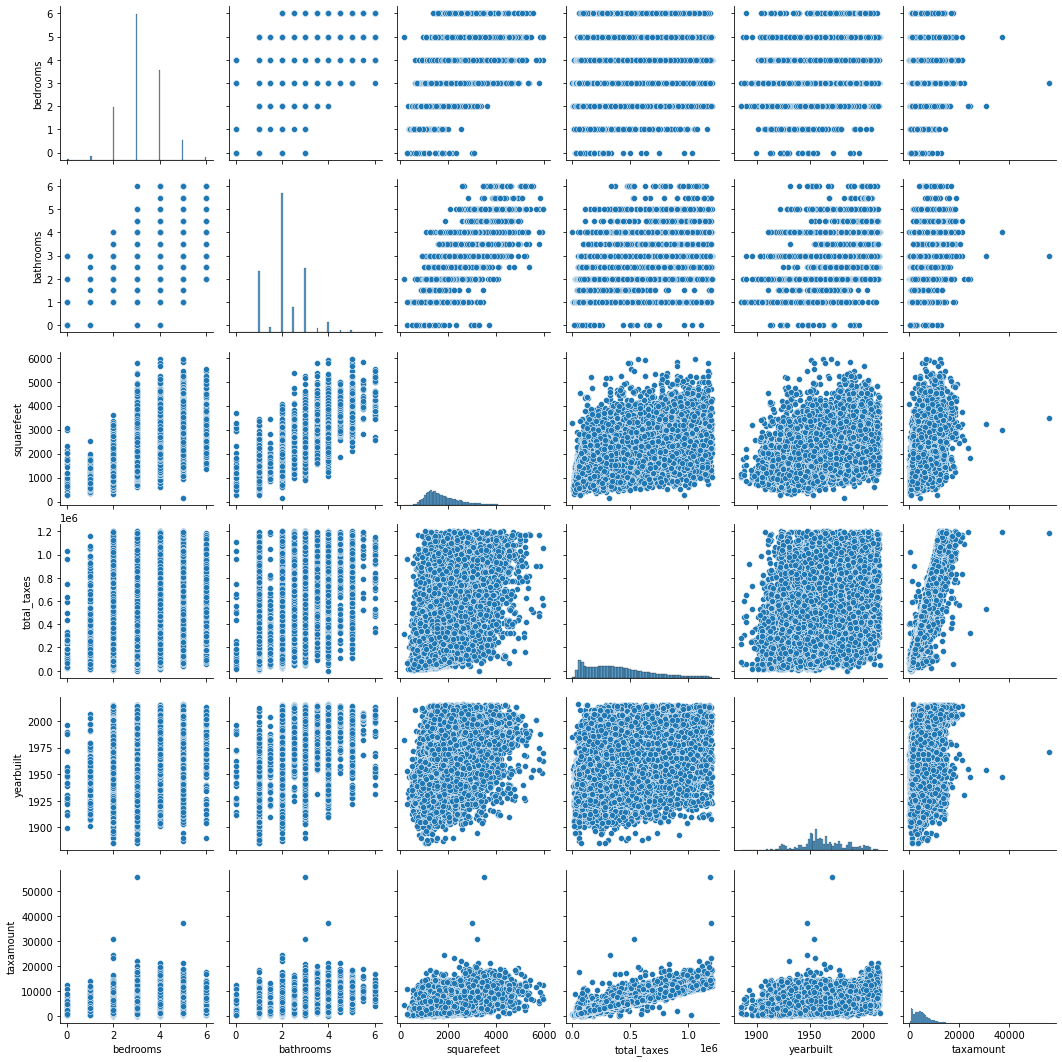

In [24]:
columns = [["squarefeet","total_taxes","taxamount","bedrooms","bathrooms","yearbuilt","county"]]
for col in columns: 
    plot= sns.pairplot(data=train)
    

In [7]:
numerical = train[["squarefeet","total_taxes","taxamount"]]
categorical = train[["bedrooms","bathrooms","yearbuilt","county"]]


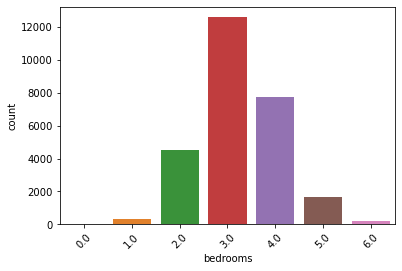

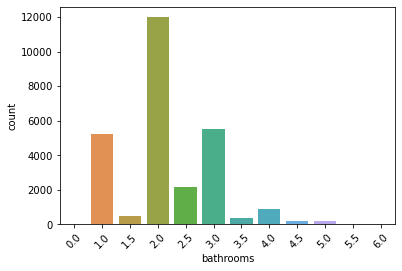

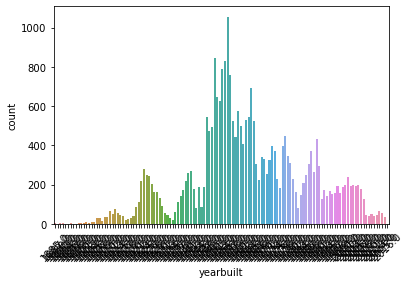

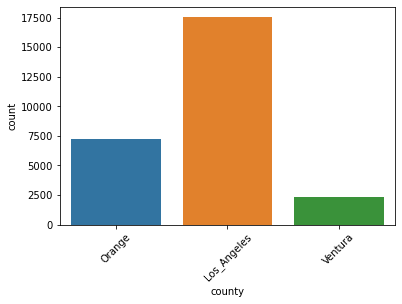

In [31]:
for i, predictor in enumerate(train.drop(columns=["squarefeet","total_taxes","taxamount"])):
    plt.figure(i)
    plot= sns.countplot(data=train, x=predictor)
    plt.setp(plot.get_xticklabels(), rotation=45)

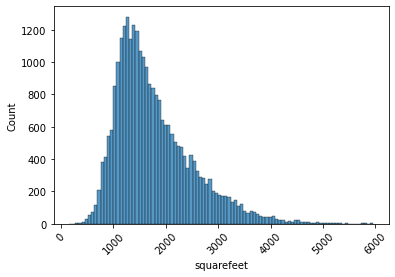

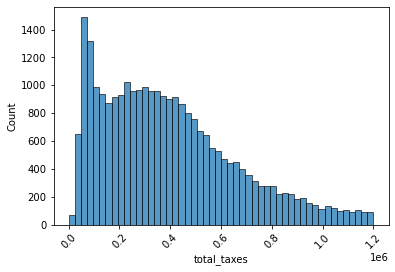

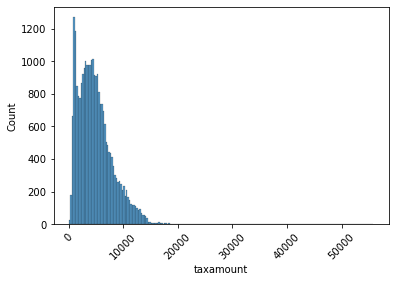

In [16]:
def plot_numericalb()    
    for i, predictor in enumerate(train.drop(columns=["bedrooms","bathrooms","yearbuilt","county"])):
        plt.figure(i)
        plot= sns.histplot(data=train, x=predictor)
        plt.setp(plot.get_xticklabels(), rotation=45)

In [ ]:
def plot_categorical_and_continuous_vars():
     for i in predictor enumerate (train[["squarefeet","total_taxes","taxamount","bedrooms","bathrooms","yearbuilt","county"]]:
         
        

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'squarefeet'}>,
        <AxesSubplot:title={'center':'total_taxes'}>],
       [<AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'taxamount'}>]], dtype=object)

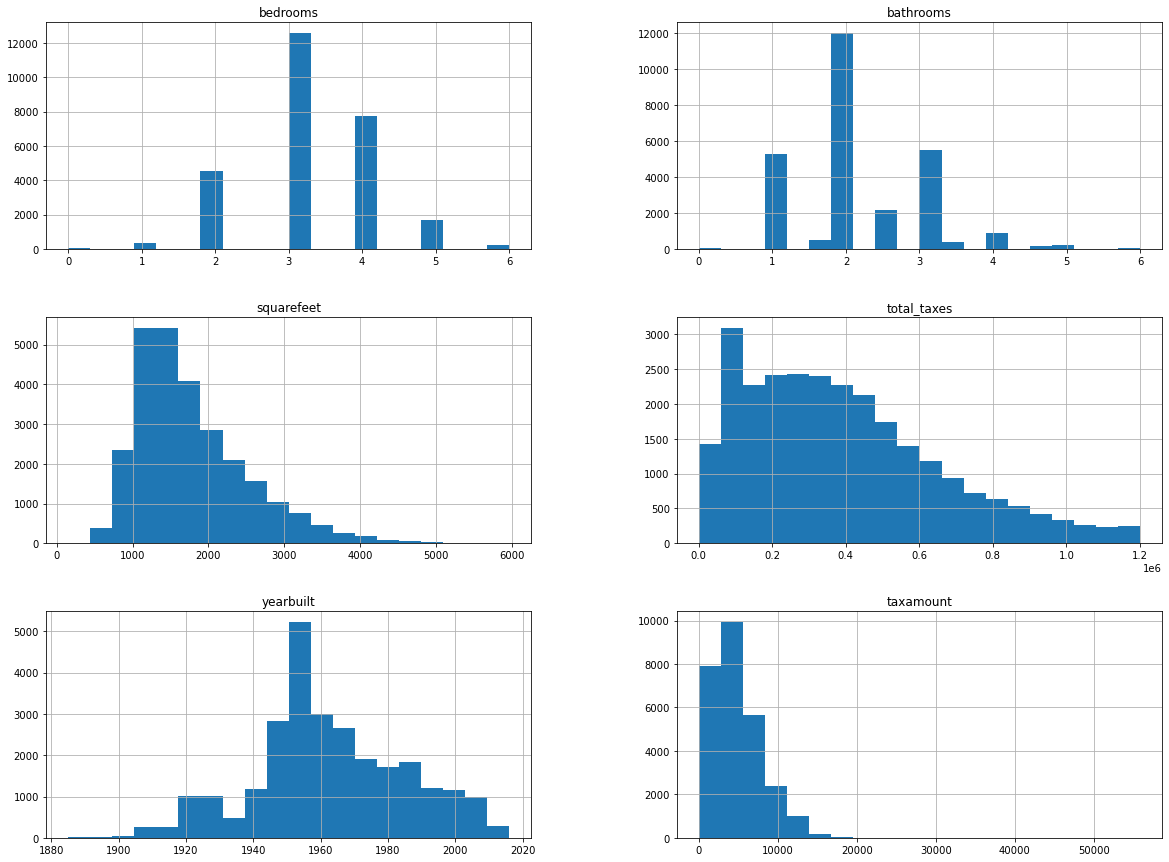

In [33]:
train.hist(bins = 20,figsize =  (20,15))

## Modeling

In [34]:
train.head()

,bedrooms,bathrooms,squarefeet,total_taxes,yearbuilt,taxamount,county
15738,3.0,2.0,1855.0,67857.0,1954.0,1070.00,Orange
32066,3.0,1.0,1082.0,295125.0,1953.0,3679.82,Los_Angeles
23254,4.0,3.0,3294.0,717274.0,2000.0,10910.16,Orange
22616,3.0,1.5,1426.0,318217.0,1968.0,3841.46,Orange
50357,4.0,3.0,2612.0,396546.0,1966.0,4961.21,Los_Angeles


In [55]:
# splitting my data
'''
This function performs split on zillow data, stratify taxvaluedollarcnt.
Returns train, validate, and test dfs.
'''
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn_Yes)
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn_Yes)
#     return train, validate, test

In [48]:
columns_to_scale = train[["bedrooms","bathrooms","squarefeet","total_taxes","taxamount"]]
columns_to_scale.head()

,bedrooms,bathrooms,squarefeet,total_taxes,taxamount
15738,3.0,2.0,1855.0,67857.0,1070.00
32066,3.0,1.0,1082.0,295125.0,3679.82
23254,4.0,3.0,3294.0,717274.0,10910.16
22616,3.0,1.5,1426.0,318217.0,3841.46
50357,4.0,3.0,2612.0,396546.0,4961.21


In [58]:
X_train, X_validate = columns_to_scale, columns_to_scale
y_train, y_validate = columns_to_scale, columns_to_scale

In [76]:
# fitting the scaled data no nead to scale target
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.fit_transform(X_validate)


In [77]:
df_scaled = pd.DataFrame(X_train_scaled)

In [45]:
df_scaled.columns = ["bedrooms","bathrooms","squarefeet","total_taxes","taxamount"]
df_scaled.head()

,bedrooms,bathrooms,squarefeet,total_taxes,taxamount
0,0.500000,0.333333,0.293216,0.055761,0.018305
1,0.500000,0.166667,0.160124,0.245309,0.065102
2,0.666667,0.500000,0.540978,0.597393,0.194752
3,0.500000,0.250000,0.219353,0.264568,0.068001
4,0.666667,0.500000,0.423554,0.329897,0.088079


In [78]:
# # We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
# y_train = pd.DataFrame(y_train)
# y_validate = pd.DataFrame(y_validate)

# # 1. Predict G3_pred_mean
# G3_pred_mean = y_train['G3'].mean()
# y_train['G3_pred_mean'] = G3_pred_mean
# y_validate['G3_pred_mean'] = G3_pred_mean

# # 2. compute G3_pred_median
# G3_pred_median = y_train['G3'].median()
# y_train['G3_pred_median'] = G3_pred_median
# y_validate['G3_pred_median'] = G3_pred_median

# # 3. RMSE of G3_pred_mean
# rmse_train = mean_squared_error(y_train.G3, y_train.G3_pred_mean)**(1/2)
# rmse_validate = mean_squared_error(y_validate.G3, y_validate.G3_pred_mean)**(1/2)

# print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
#       "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# # 4. RMSE of G3_pred_median
# rmse_train = mean_squared_error(y_train.G3, y_train.G3_pred_median)**(1/2)
# rmse_validate = mean_squared_error(y_validate.G3, y_validate.G3_pred_median)**(1/2)

# print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
#       "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))


In [60]:
# 1. Predict G3_pred_mean
total_taxes_pred_mean = y_train['total_taxes'].mean()
y_train['total_taxes_pred_mean'] = total_taxes_pred_mean
y_validate['total_taxes_pred_mean'] = total_taxes_pred_mean
